# _*Loading and Processing Stock-Market Time-Series Data*_

### Introduction

Across many problems in finance, one starts with time series. Here, we showcase how to generate pseudo-random time-series, download actual stock-market time series from a number of common providers, and how to compute time-series similarity measures.

In [1]:
%matplotlib inline
from qiskit.finance import QiskitFinanceError
from qiskit.finance.data_providers import *
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
data = RandomDataProvider(tickers=["TICKER1", "TICKER2"],
                 start = datetime.datetime(2016, 1, 1),
                 end = datetime.datetime(2016, 1, 30),
                 seed = 1)
data.run()

Once the data are loaded, you can run a variety of algorithms on those to aggregate the data. Notably, you can compute the covariance matrix or a variant, which would consider alternative time-series similarity measures based on <a target="_blank" href="https://en.wikipedia.org/wiki/Dynamic_time_warping">dynamic time warping</a> (DTW). In DTW, changes that vary in speed, e.g., one stock's price following another stock's price with a small delay, can be accommodated.

Means:
[16.66722941 72.03026566]
A time-series similarity measure:
[[1.0000000e+00 6.2284804e-04]
 [6.2284804e-04 1.0000000e+00]]


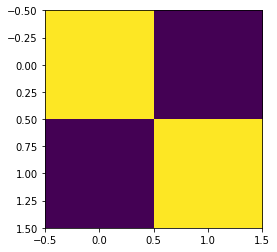

A covariance matrix:
[[ 1.75870991 -0.32842528]
 [-0.32842528  2.31429182]]


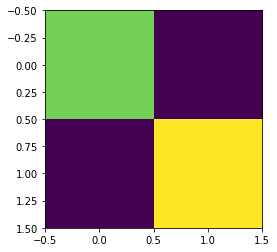

In [3]:
means = data.get_mean_vector()
print("Means:")
print(means)

rho = data.get_similarity_matrix()
print("A time-series similarity measure:")
print(rho)
plt.imshow(rho)
plt.show()

cov = data.get_covariance_matrix()
print("A covariance matrix:")
print(cov)
plt.imshow(cov)
plt.show()

If you wish, you can look into the underlying pseudo-random time-series using. Please note that the private class members (starting with underscore) may change in future releases of Qiskit.

The underlying evolution of stock prices:


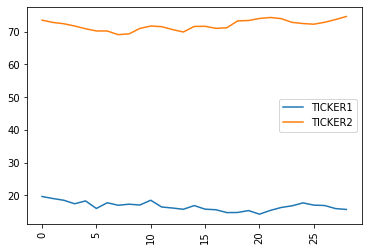

TICKER1
[19.62434536366324, 19.012588950013168, 18.48441719774971, 17.41144857559354, 18.276856204918218, 15.975317508037936, 17.720129272254415, 16.958922371359314, 17.27796146741641, 17.028591091939003, 18.490699028983975, 16.430558319486323, 16.108141115472815, 15.724086760804399, 16.857856203139836, 15.757964935825806, 15.58553672827537, 14.707678310353998, 14.74989205706959, 15.332707270785413, 14.232088093572491, 15.376811803412107, 16.2784025240049, 16.78089686290677, 17.68175281217118, 16.998024952996847, 16.8751347274782, 15.939365293219131, 15.671477213593114]
TICKER2
[73.53035546673819, 72.83869471501288, 72.4419411881569, 71.7547684880373, 70.90956284653858, 70.23831671570176, 70.22565211678285, 69.10834176814758, 69.34275746596468, 71.00255964307455, 71.74460380365188, 71.55276825129026, 70.66513928720543, 69.91798099345459, 71.61043559448234, 71.66124334925837, 71.02424770268901, 71.21516318735648, 73.31541832383532, 73.43557727631695, 74.05278038602437, 74.35295070598019

In [4]:
print("The underlying evolution of stock prices:")
for (cnt, s) in enumerate(data._tickers):
    plt.plot(data._data[cnt], label=s)
plt.legend()
plt.xticks(rotation=90)
plt.show()

for (cnt, s) in enumerate(data._tickers):
    print(s)
    print(data._data[cnt])

Clearly, you can adapt the number and names of tickers and the range of dates: 

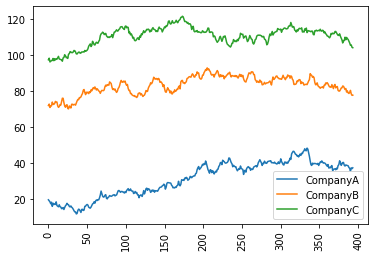

In [5]:
data = RandomDataProvider(tickers=["CompanyA", "CompanyB", "CompanyC"],
                 start = datetime.datetime(2015, 1, 1),
                 end = datetime.datetime(2016, 1, 30),
                 seed = 1)
data.run()
for (cnt, s) in enumerate(data._tickers):
    plt.plot(data._data[cnt], label=s)
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [6]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright